**The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. We cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Our benchmark has the following properties:
**
Single-image, multi-class classification problem
More than 40 classes


More than 50,000 images in total
Large, lifelike database

In [1]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import matplotlib.image as mpimg
import os
from PIL import Image
import seaborn as sns
from sklearn.model_selection import  train_test_split
from keras.utils import to_categorical



#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))



In [2]:
print(os.listdir('../input/gtsrb-german-traffic-sign'))

['Test', 'meta', 'Train', 'Test.csv', 'Train.csv', 'Meta', 'test', 'train', 'Meta.csv']


finding the best values for Height and Width according to the pictures dimension.


examing 9 of the pictures in the dataset.
* 

   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  
33    1380
31    1368
34    1335
36    1301
35    1300
Name: Height, dtype: int64
34    1327
35    1323
31    1319
33    1316
30    1304
Name: Width, dtype: int64


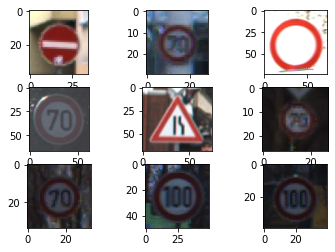

In [3]:

df=pd.read_csv('../input/gtsrb-german-traffic-sign/Train.csv')
# finding the best values for Height and Width
print(df.head())
print(df['Height'].value_counts()[:5].sort_values(ascending=False))
print(df['Width'].value_counts()[:5].sort_values(ascending=False))
height=33
width=33

# examing the pictures
data_dir = "../input/gtsrb-german-traffic-sign"
img_path= list((data_dir + '/' + str(df.Path[i])) for i in range(len(df.Path)))
for i in range(0,9):
    plt.subplot(331+i)
    seed=np.random.randint(0,29222)
    img= mpimg.imread(img_path[seed])
    plt.imshow(img)
    
plt.show()



In [4]:
data=[]
labels=[]

classes = 43
n_inputs = height * width*3

for i in range(classes) :
    path = "../input/gtsrb-german-traffic-sign/train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
train_data=np.array(data)
labels=np.array(labels)

data=np.arange(train_data.shape[0])
train_data=train_data[data]
labels=labels[data]

../input/gtsrb-german-traffic-sign/train/0/
../input/gtsrb-german-traffic-sign/train/1/
../input/gtsrb-german-traffic-sign/train/2/
../input/gtsrb-german-traffic-sign/train/3/
../input/gtsrb-german-traffic-sign/train/4/
../input/gtsrb-german-traffic-sign/train/5/
../input/gtsrb-german-traffic-sign/train/6/
../input/gtsrb-german-traffic-sign/train/7/
../input/gtsrb-german-traffic-sign/train/8/
../input/gtsrb-german-traffic-sign/train/9/
../input/gtsrb-german-traffic-sign/train/10/
../input/gtsrb-german-traffic-sign/train/11/
../input/gtsrb-german-traffic-sign/train/12/
../input/gtsrb-german-traffic-sign/train/13/
../input/gtsrb-german-traffic-sign/train/14/
../input/gtsrb-german-traffic-sign/train/15/
../input/gtsrb-german-traffic-sign/train/16/
../input/gtsrb-german-traffic-sign/train/17/
../input/gtsrb-german-traffic-sign/train/18/
../input/gtsrb-german-traffic-sign/train/19/
../input/gtsrb-german-traffic-sign/train/20/
../input/gtsrb-german-traffic-sign/train/21/
../input/gtsrb-germa

# taking a look at how many pictures there are in of the 43 diffrent traffic signs labels

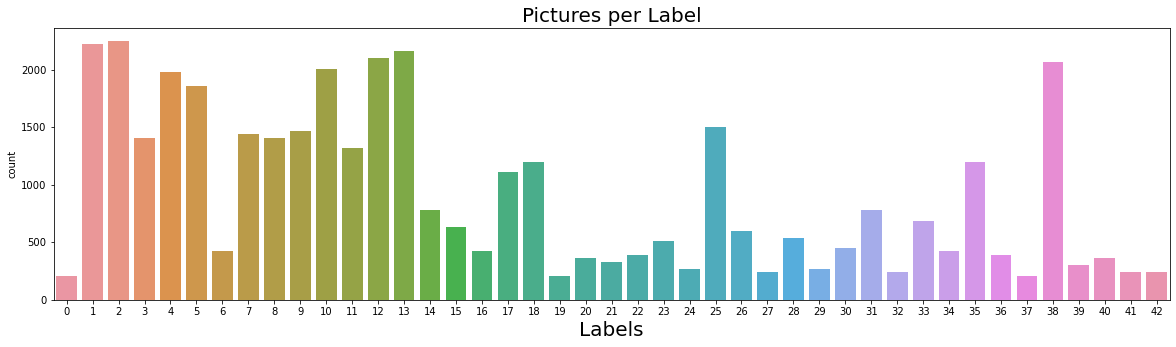

In [5]:
plt.figure(figsize=(20,5))
sns.countplot(labels)
plt.title('Pictures per Label', fontsize = 20)
plt.xlabel('Labels', fontsize=20)
plt.show()


In [6]:


x_train, x_val, y_train, y_val = train_test_split(train_data, labels , test_size = 0.2, random_state = 68)
print("Train :", x_train.shape)
print("Valid :", x_val.shape)
x_train = x_train.astype('float32')/255 
x_val = x_val.astype('float32')/255

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)


Train : (31367, 33, 33, 3)
Valid : (7842, 33, 33, 3)


> Building the CNN Model

In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy') is not None and logs.get('accuracy') > 0.985:
      print("\n reached 98.5% accuracy so canceling training!")
      self.model.stop_training=True

In [8]:
#Definition of the DNN model

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(x_train.shape[1:])),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(43, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [10]:
epochs = 20
callbacks=myCallback()
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs,
validation_data=(x_val, y_val),callbacks=[callbacks])



Epoch 1/20
981/981 [==============================] - 5s 5ms/step - loss: 1.4161 - accuracy: 0.5844 - val_loss: 0.2263 - val_accuracy: 0.9454
Epoch 2/20
981/981 [==============================] - 5s 5ms/step - loss: 0.2697 - accuracy: 0.9177 - val_loss: 0.0851 - val_accuracy: 0.9765
Epoch 3/20
981/981 [==============================] - 4s 4ms/step - loss: 0.1596 - accuracy: 0.9498 - val_loss: 0.0531 - val_accuracy: 0.9841
Epoch 4/20
981/981 [==============================] - 5s 5ms/step - loss: 0.1187 - accuracy: 0.9637 - val_loss: 0.0496 - val_accuracy: 0.9852
Epoch 5/20
981/981 [==============================] - 4s 5ms/step - loss: 0.1007 - accuracy: 0.9704 - val_loss: 0.0290 - val_accuracy: 0.9917
Epoch 6/20
981/981 [==============================] - 4s 4ms/step - loss: 0.0827 - accuracy: 0.9749 - val_loss: 0.0276 - val_accuracy: 0.9922
Epoch 7/20
981/981 [==============================] - 4s 5ms/step - loss: 0.0785 - accuracy: 0.9753 - val_loss: 0.0282 - val_accuracy: 0.9911
Epoch 

**Plotting figures to see the Accuracy and the Loss per Epoch**

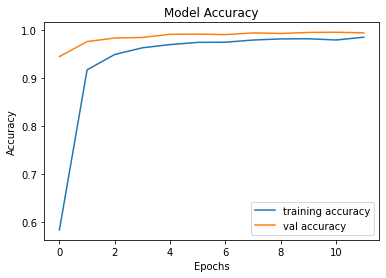

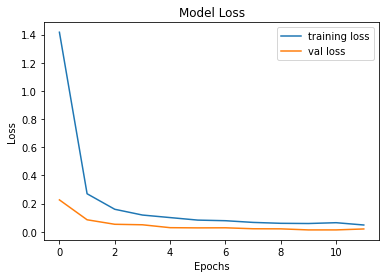

In [11]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Making Prediction with the Test Dataset


In [12]:
y_test=pd.read_csv("../input/gtsrb-german-traffic-sign/Test.csv")
labels=y_test['Path']
y_test=y_test['ClassId']
y_test = to_categorical(y_test,43)

data=[]

for f in labels:
    image=cv2.imread('../input/gtsrb-german-traffic-sign/test/'+f.replace('Test/', ''))
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 

results = model.evaluate(X_test, y_test, batch_size=128)

print("test loss, test acc:", results)


99/99 [==============================] - 0s 4ms/step - loss: 0.1667 - accuracy: 0.9626
test loss, test acc: [0.1666857898235321, 0.9626286625862122]


[14]
1.0


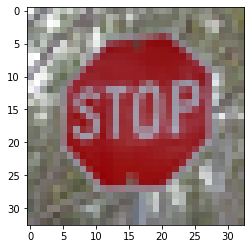

In [13]:
image=cv2.imread('../input/stopsign2/stop.jpg')



data=[]
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_from_array = Image.fromarray(image, 'RGB')
size_image = image_from_array.resize((height, width))
data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255     
pred=model.predict_classes(X_test)
print(pred)
print(model.predict(X_test)[0][14])

plt.imshow(size_image)

plt.show()

[13]
0.99999964


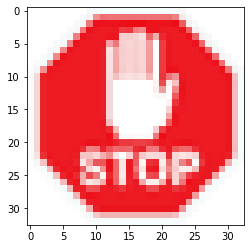

In [14]:
image=cv2.imread('../input/stopsign/.png')



data=[]
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_from_array = Image.fromarray(image, 'RGB')
size_image = image_from_array.resize((height, width))
data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255     
pred=model.predict_classes(X_test)
print(pred)
print(model.predict(X_test)[0][13])

plt.imshow(size_image)

plt.show()

Suprisingly the model overfitted to Stop signs that dont have the Hand sign next to the "Stop" label.

# Verdict

* 98.5% accuracy on Training Set
* 99.3% accuracy on Validation Set
* 96.1% accuracy on Testing Set 

seems like good results to me for a pretty basic model.
